# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 333

# Apartado 2: Recuperación de información

__Número de grupo: G19__

__Nombres de los estudiantes: SÁNCHEZ GÓMEZ, ALBERTO y CARPIO CUENCA, SARA__

## 1) Carga del conjunto de datos

<blockquote>

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 
</blockquote>

In [2]:
import pandas as pd

In [3]:
df_bbc = pd.read_csv('BBC News.csv')
df_bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df_bbc.groupby('Category').describe()

ArticleId                                                 \
                  count         mean         std   min     25%     50%   
Category                                                                 
business          336.0  1104.315476  658.063510   2.0  476.25  1107.5   
entertainment     273.0  1100.274725  615.695597  10.0  601.00  1081.0   
politics          274.0  1134.317518  637.628980   7.0  610.00  1163.0   
sport             346.0  1104.057803  649.542516   4.0  513.50  1070.0   
tech              261.0  1165.195402  643.852459  20.0  631.00  1147.0   

                                
                   75%     max  
Category                        
business       1716.25  2221.0  
entertainment  1611.00  2223.0  
politics       1681.50  2224.0  
sport          1689.50  2219.0  
tech           1755.00  2216.0

Podemos observar que la distribución de artículos en las diferentes categorías es bastante homógenea. Esto debería proporcionar buenos resultados en la clasificación de textos ya que tenemos muchos ejemplos distribuidos entre todas las categorías, facilitando que haya más palabras que se repitan entre los artículos de una misma clase.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
bbc_train, bbc_test = train_test_split(df_bbc, test_size=0.20, random_state=RANDOM_STATE)

In [7]:
bbc_train

,ArticleId,Text,Category
955,167,springer criticises opera musical talk show ho...,entertainment
593,2220,beijingers fume over parking fees choking traf...,business
565,1772,apple laptop is greatest gadget the apple po...,tech
64,315,two nigerian banks set to merge nigerian banks...,business
1422,159,uk firms embracing e-commerce uk firms are e...,politics
...,...,...,...
46,593,china ripe for media explosion asia is set t...,tech
1398,1436,banker loses sexism claim a former executive a...,business
1390,479,rap feud in 50 cent s g-unit crew us rap star ...,entertainment
1443,1490,unclear future for striker baros liverpool for...,sport


In [8]:
bbc_test

,ArticleId,Text,Category
741,231,tv show unites angolan families angolan famili...,entertainment
637,427,bortolami predicts dour contest italy skipper ...,sport
1298,1369,no uk apology for colonial past the days of b...,politics
316,372,us peer-to-peer pirates convicted the first co...,tech
1435,1166,relay squad thrilled with honours jason garden...,sport
...,...,...,...
1041,1011,gadget show heralds mp3 season partners of tho...,tech
404,1381,world leaders gather to face uncertainty more ...,business
1198,2166,briton wins short film oscar three of the five...,entertainment
79,1929,ukraine strikes turkmen gas deal ukraine has a...,business


In [9]:
bbc_train.groupby("Category").describe()

ArticleId                                                \
                  count         mean         std   min    25%     50%   
Category                                                                
business          263.0  1136.680608  647.030112  19.0  629.5  1124.0   
entertainment     212.0  1087.221698  634.933226  10.0  565.5  1061.0   
politics          214.0  1113.971963  635.296219   7.0  584.5  1116.5   
sport             285.0  1089.859649  634.695353   4.0  533.0  1047.0   
tech              218.0  1177.183486  648.441942  20.0  645.5  1182.5   

                                
                   75%     max  
Category                        
business       1744.00  2221.0  
entertainment  1635.25  2223.0  
politics       1641.50  2207.0  
sport          1642.00  2219.0  
tech           1757.50  2216.0

In [10]:
bbc_test.groupby("Category").describe()

ArticleId                                                  \
                  count         mean         std    min     25%     50%   
Category                                                                  
business           73.0   987.712329  688.367140    2.0  334.00   992.0   
entertainment      61.0  1145.639344  545.982479   38.0  836.00  1183.0   
politics           60.0  1206.883333  646.007296   14.0  618.75  1280.0   
sport              61.0  1170.393443  716.768984   18.0  460.00  1163.0   
tech               43.0  1104.418605  623.895108  184.0  573.50  1022.0   

                                
                   75%     max  
Category                        
business       1516.00  2186.0  
entertainment  1540.00  2212.0  
politics       1717.25  2224.0  
sport          1871.00  2173.0  
tech           1720.00  2184.0

Puesto que la variable <code>RANDOM_STATE</code> tiene el mismo valor que en el cuaderno 1, la partición es exactamente la misma.

## 2) Representación basada en bolsa de palabras y tf-idf

<blockquote>

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?
</blockquote>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range = (1,1))

# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(bbc_train['Text'])
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(bbc_test['Text'])

In [13]:
# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()

train_preprocessed = tfidfer.fit_transform(train_vector_data)
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)

In [14]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [15]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names[:100])

22201
['00', '000', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0630', '069', '07', '070', '0710', '072', '0730', '08', '080', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '107', '108', '1080', '109', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120gb']


In [16]:
write_terms(feature_names, bbc_train['Text'].values, train_vector_data, 10)

Mensaje 10 : foxx and swank take actors awards jamie foxx and hilary swank have won the screen actors guild awards for best male and female film actors  boosting their oscars hopes this month.  foxx s portrayal of late soul-singer ray charles in ray had already earned him a prestigious golden globe award. swank triumphed for playing a gutsy female boxer in million dollar baby. modest wine country comedy sideways knocked out favourites million dollar baby and the aviator by taking the top prize for best cast performance.  the screen actors guild (sag) represents us film and tv actors. its winners often go on to win oscars. in other nominations  cate blanchett triumphed as the best supporting actress for her role as katharine hepburn in the aviator. veteran actor morgan freeman took the best supporting actor award for playing a prize-fighter turned gym manager in million dollar baby.   thank you for ray charles for just living so complex and so interesting  and making us all just come to

In [17]:
write_terms(feature_names, bbc_train['Text'].values, train_vector_data, 100)

Mensaje 100 : film production  falls  40% in uk the number of british films produced in the uk fell 40% in 2004  with movies starring johnny depp and jude law among those affected  screen daily has said.  twenty-seven british films were made in the uk last year following a drop in funding  compared with 45 in 2003  according to the trade weekly. it attributed the drop to tighter tax laws and reduced funding from sources such as the national lottery. uk and us co-productions in britain fell from 102 in 2003 to 81 last year.  last year the government closed tax loopholes that many film investors had taken advantage of to fund films in the uk. several projects were shelved as they faced the implications of this clampdown  coupled with the reduction in movie funding from traditional sources including the lottery and miramax films. shooting on period drama tulip fever  which was to star jude law and keira knightley  was postponed indefinitely while shooting of the libertine starring johnny 

En cada mensaje podemos observar que la lista de palabras del mensaje vectorizado es menor que la lista de palabras que aparecen en el mensaje original. Esto se debe a que se han eliminado todas las `stop-words` que le indicamos al vectorizador cuando le creamos.

#### Cálculo de precisión

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [19]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [20]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

In [21]:
p5 = mean_precisions_per_class(train_preprocessed, bbc_train['Category'], test_preprocessed, bbc_test['Category'], 5)
p5

{'business': 84.38356164383562,
 'entertainment': 84.26229508196721,
 'politics': 88.66666666666667,
 'sport': 97.70491803278688,
 'tech': 88.83720930232558}

,Category,precision@5
0,business,84.383562
1,entertainment,84.262295
2,politics,88.666667
3,sport,97.704918
4,tech,88.837209


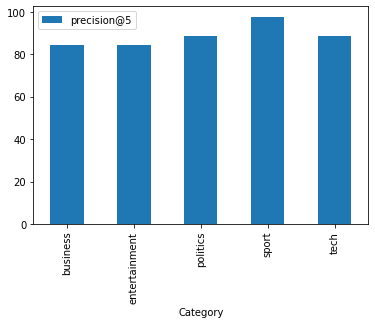

In [22]:
df_p5 = pd.Series(p5, name='precision@5')
df_p5.index.name = 'Category'
df_p5 = df_p5.reset_index()

df_p5.plot.bar(x = 'Category', y = 'precision@5')
df_p5

Si analizamos los valores de precisión medios para las distintas clases del conjunto de datos podemos ver que la categoría sin duda que mayor precisión tiene es `sport` (98 precisión) . La siguen `tech` y `politics` emparejadas (88 precisión), y después estan el resto (emparejadas también a una precisión de 84).

Que `sport` sea la clase con mayor precisión puede ser porque en los textos de deportes se repiten muchas palabras (por ejemplo, en un texto de futbol siempre se van a repetir gol, jugador, pase...). Además, esta categoría es la que más textos tiene en la partición de entrenamiento, lo que puede haber servido para que aprenda más de esta categoría.

`Business` y `entertainment` puede que sean las más bajas ya que son categorías que no tienen un vocabulario tan amplio.

En `tech` puede pasar lo mismo que con `sport`, hay muchas palabras que se pueden repetir a lo largo de muchas noticias.

En general, en todas las categorías, la precisión es muy alta.

## 3) Representación basada en word-embeddings y tf-idf

<blockquote>

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como los pesos tf-idf de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.
</blockquote>

In [23]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_file = 'glove.6B.50d.txt'

model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)
we_vocabulary = list(model.key_to_index.keys())

In [24]:
vectorizer_emb = CountVectorizer(vocabulary = we_vocabulary, stop_words='english', binary=False, ngram_range = (1,1))

train_vector_data_emb = vectorizer_emb.fit_transform(bbc_train['Text'])
test_vector_data_emb = vectorizer_emb.transform(bbc_test['Text'])

In [25]:
tfidfer = TfidfTransformer()

train_preprocessed_emb = tfidfer.fit_transform(train_vector_data_emb)
test_preprocessed_emb = tfidfer.transform(test_vector_data_emb)

In [26]:
from scipy.sparse import find

def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 
    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [27]:
train_embed_matrix = create_doc_embedding(train_preprocessed_emb,model)
test_embed_matrix = create_doc_embedding(test_preprocessed_emb,model)

In [28]:
p5_emb = mean_precisions_per_class(train_embed_matrix, bbc_train['Category'], test_embed_matrix, bbc_test['Category'], 5)
p5_emb

{'business': 89.04109589041096,
 'entertainment': 93.44262295081967,
 'politics': 92.33333333333333,
 'sport': 98.36065573770492,
 'tech': 92.09302325581395}

,Category,precision@5
0,business,89.041096
1,entertainment,93.442623
2,politics,92.333333
3,sport,98.360656
4,tech,92.093023


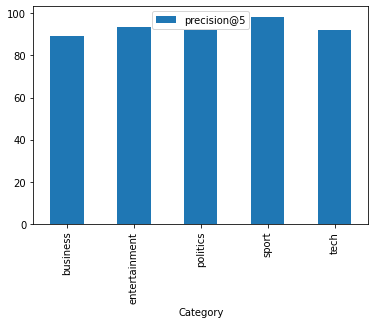

In [29]:
df_p5_emb = pd.Series(p5_emb, name='precision@5')
df_p5_emb.index.name = 'Category'
df_p5_emb = df_p5_emb.reset_index()

df_p5_emb.plot.bar(x = 'Category', y = 'precision@5')
df_p5_emb

||Business|entertainment|politics|sport|tech|
|---|--------|------------|---|---|---|
|BoW|84.383562|84.262295|88.666667|97.704918|88.837209|
|W-E|89.041095|93.442623|92.333333|98.360656|92.093023|

Podemos observar una clara mejora en todas las categorías al usar el sistema de word-embedings sobre los documentos. A diferencia de la representación de bolsa de palabras, word-embedings representa de forma similar aquellas palabras (o textos en este caso) que guardan un significado similar.

Como los textos ya no se clasifican según su vocabulario, sino según su similitud, la falta de vocabulario concreto perteneciente a una determinada categoría o el uso continuado de palabras sin tanto significado que hayan escapado del `stop_words` ya no causa tanta confusión, lo que provoca el aumento de precisión en todas la  categorias.

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

##### 1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings

In [30]:
df_diff = pd.DataFrame([], columns=['Category', 'Difference'])
df_diff['Difference'] = abs(df_p5_emb['precision@5'] - df_p5['precision@5'])
df_diff['Category'] = df_p5['Category']
df_diff

,Category,Difference
0,business,4.657534
1,entertainment,9.180328
2,politics,3.666667
3,sport,0.655738
4,tech,3.255814


Hemos creado un nuevo dataframe simplemente para ver los datos más facilmente.
Vemos que `entertainment` es la categoría que más a mejorado.

##### 2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings

In [37]:
l = list()
for i in range(0,298):
    idx = knn(test_preprocessed[i],train_preprocessed, 5)
    y_selected = np.take(bbc_train['Category'], idx)
    precision = precision_at_k(y_selected, 'entertainment', 5)
    l.append(precision)

In [38]:
l2 = list()
for i in range(0,298):
    idx = knn(test_embed_matrix[i], train_embed_matrix, 5)
    y_selected = np.take(bbc_train['Category'], idx)
    precision = precision_at_k(y_selected, 'entertainment', 5)
    l2.append(precision)

In [39]:
difference = []

zip_object = zip(l2, l)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)

np.array(difference).argmax()

110

Hemos identificado el texto que más a mejorado al usar las word-embeddings.

Este texto se encuentra en la posición 110 de bbc_test

##### 3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).

In [40]:
bbc_test['Text'].values[110]

'holmes wins  2004 top tv moment  sprinter kelly holmes  olympic victory has been named the top television moment of 2004 in a bbc poll.  holmes  800m gold medal victory beat favourite moments from drama  comedy and factual programmes  as voted by television viewers. natasha kaplinsky s strictly come dancing win was top entertainment moment and a little britain breast feeding sketch won the comedy prize. the 2004 tv moments will be shown on bbc one at 2000 gmt on wednesday. double gold medal winner holmes topped the best sports moment category  beating maria sharapova s wimbledon triumph and matthew pinsent s rowing victory at the olympics.  she then went on to take the overall prize of golden tv moment. the sight of former royal correspondent jennie bond with dozens of rats crawling over her in itv s i m a celebrity get me out of here was named best factual entertainment moment. michael buerk s return to ethiopia  20 years after originally reporting its famine  topped the factual cate

In [74]:
bbc_test['Category'].values[110]

'entertainment'

In [41]:
write_terms(feature_names, None, test_vector_data, 110)

Mensaje 110 vectorizado: ['20' '2000' '2004' '800m' 'bbc' 'beat' 'beating' 'best' 'bond' 'breast'
 'britain' 'category' 'celebrity' 'character' 'come' 'comedy' 'confided'
 'correspondent' 'dancing' 'den' 'dot' 'double' 'dozens' 'drama'
 'eastenders' 'entertainment' 'ethiopia' 'factual' 'famine' 'favourite'
 'feeding' 'gmt' 'gold' 'golden' 'holmes' 'itv' 'kelly' 'little' 'long'
 'maria' 'matthew' 'medal' 'michael' 'moment' 'moments' 'named' 'natasha'
 'olympic' 'olympics' 'originally' 'overall' 'poll' 'popular' 'prize'
 'programme' 'programmes' 'rats' 'reporting' 'return' 'royal' 'running'
 'sharapova' 'shown' 'sight' 'sketch' 'soap' 'sports' 'sprinter'
 'strictly' 'television' 'title' 'topped' 'triumph' 'tv' 'victory'
 'viewers' 'voted' 'watts' 'wednesday' 'went' 'wimbledon' 'win' 'winner'
 'wins' 'won' 'world' 'years'] 



In [42]:
feature_names_emb = vectorizer_emb.get_feature_names()
write_terms(feature_names_emb, None, test_vector_data_emb, 110)

Mensaje 110 vectorizado: ['years' 'world' 'long' 'wednesday' 'won' 'best' 'win' '20' 'come'
 'little' 'went' 'television' 'return' 'named' 'victory' '2000' 'britain'
 'title' '2004' 'gold' 'michael' 'running' 'popular' 'tv' 'sports' 'beat'
 'olympic' 'royal' 'overall' 'double' 'winner' 'character' 'originally'
 'olympics' 'moment' 'medal' 'shown' 'gmt' 'bond' 'poll' 'wins' 'prize'
 'voted' 'entertainment' 'dozens' 'golden' 'drama' 'beating' 'comedy'
 'category' 'programme' 'bbc' 'reporting' 'maria' 'kelly' 'viewers'
 'moments' 'matthew' 'wimbledon' 'sight' 'ethiopia' 'celebrity' 'breast'
 'dancing' 'correspondent' 'triumph' 'topped' 'feeding' 'strictly' 'soap'
 'programmes' 'holmes' 'favourite' 'den' 'dot' 'watts' 'famine' 'rats'
 'sketch' 'sharapova' 'rowing' 'itv' 'sprinter' 'factual' 'natasha'
 'crawling' 'confided' '800m' 'eastenders' 'jennie' 'unwell' 'pinsent'
 'kaplinsky' 'buerk'] 



##### 4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)

###### TF-IDF puro

In [43]:
knn(test_preprocessed[110],train_preprocessed, 5)

array([ 23, 992, 117, 915, 421], dtype=int64)

In [44]:
print(bbc_train['Text'].values[23])
print()
print(bbc_train['Category'].values[23])

holmes starts 2005 with gb events kelly holmes will start 2005 with a series of races in britain.  holmes will make her first track appearance on home soil since winning double olympic gold in january s norwich union international in glasgow. she will also run in the grand prix in birmingham in february and may defend her indoor aaa 800m title in sheffield earlier that month.  i am still competitive and still want to win   she said.  i m an athlete and i can t wait to get back on the track.  she added:  these events are also a great opportunity to thank the british public for the enormous levels of support they have given me from the moment i stepped off that plane from greece.  the glasgow meeting will see holmes compete over 1500m in a five-way match against sweden  france  russia and italy.

sport


In [45]:
print(bbc_train['Text'].values[117])
print()
print(bbc_train['Category'].values[117])

holmes secures comeback victory britain s kelly holmes marked her first appearance on home soil since winning double olympic gold with 1500m victory at the norwich union international.  holmes hit the front just before the bell in front of a sell-out crowd in glasgow and cruised to victory in a time of four minutes 14.74 seconds.  it was nice to get that out of the way. i was nervous about whether i would actually be able to get round.  i felt good. i just had to relax and use my racing knowledge   said holmes.  it was all about winning in front of my home crowd. the time is irrelevant.  i got round in one piece and didn t disgrace myself. now it s about going forward.  the reception i ve had since the olympics has been amazing and that s why i wanted to keep running this year  because i get a buzz from the crowd.  holmes ran a tactically perfect race to finish clear of france s hind dehiba and russia s svetlana cherkasova. the olympic 800m and 1500m champion s time was inside the qual

In [46]:
print(bbc_train['Text'].values[421])
print()
print(bbc_train['Category'].values[421])

britain boosted by holmes double athletics fans endured a year of mixed emotions in 2004 as stunning victories went hand-in-hand with disappointing defeats and more drugs scandals.  kelly holmes finally fulfilled her potential by storming to double gold on the track at the olympic games. holmes helped erase the gloom hanging over team gb after their biggest medal hope  paula radcliffe  dropped out of the marathon and then the 10 000m. britain s men s 4x100m relay team also did their bit by taking a shock gold. holmes had started the year in disappointing style  falling over in the final of 1500m at the world indoor championships where she was favourite. her olympic build-up was clouded by self doubt but that proved unfounded as she overhauled rival maria mutola to win the 800m - her first global title. just five days later  the 34-year-old made it double gold in the 1500m. it was the first time in 84 years a briton has achieved the olympic middle-distance double. while holmes left athe

In [47]:
print(bbc_train['Text'].values[915])
print()
print(bbc_train['Category'].values[915])

holmes urged to compete at worlds jolanda ceplak has urged britain s kelly holmes to continue competing at the major championships.  double olympic gold medallist holmes has strongly hinted she will not run in this year s worlds and is undecided about next month s european indoors. but world indoor 800m record holder ceplak said:  there is never an easy race when she is in the field. there is only excitement at what might happen.  it is good for the sport. she always fetches the best out of everyone.  ceplak has been a great rival of holmes  during the briton s career and the pair fell out when holmes questioned the manner of the slovenian s runaway 800m victory at the 2002 european championships. but the controversy has since been forgotten  with ceplak acting as pacemaker for holmes  failed attempt on the british indoor 1500m record at the norwich union grand prix in birmingham in 2003.  ceplak added:  i like running against her - you know the race is always going to be fast.  that i

In [48]:
print(bbc_train['Text'].values[992])
print()
print(bbc_train['Category'].values[992])

holmes is hit by hamstring injury kelly holmes has been forced out of this weekend s european indoor athletics championships after picking up a hamstring injury during training.  the double olympic champion said:  i am very disappointed that i have been forced to withdraw.  i can hardly walk at the moment and i won t be able to do any running for two or three weeks although i ll be keeping fit as best i can.  holmes will have now have intensive treatment in south africa.  the 34-year-old made a cautious start to the season but looked back to her best when she stormed to the 1 000m title at the birmingham grand prix 10 days ago. after that race and more progress in training  holmes revealed she had decided to compete at the european indoors before her plans were wrecked last weekend.  on saturday night i pulled my hamstring running the last bend on my final 200m of the night   said holmes.  i was going really  really well when i felt a massive spasm in my left leg and my hamstring blew.

##### Word-Embeddings

In [49]:
knn(test_embed_matrix[110],train_embed_matrix, 5)

array([1135,  408,  266,  283,  101], dtype=int64)

In [50]:
print(bbc_train['Text'].values[101])
print()
print(bbc_train['Category'].values[101])

celebrities get their skates on former england footballer paul gascoigne will join eastenders  actress scarlett johnson on bbc one s strictly ice dancing.  the one-off christmas special will also star television presenter carol smillie and jessica taylor from liberty-x. each celebrity will be paired with a professional skater to impress a panel of judges and win the audience vote. the bbc is yet to confirm the final two stars who will battle it out to become ice king or queen.  veteran presenter bruce forsyth and tess daly will host the programme  which follows hot on the heels of the current saturday night series strictly come dancing. the celebrities will have to practise a stipulated ice dance and perform it at an ice rink with their partner. the judges will have 50% of the vote to decide who wins the contest  with the ice rink audience making up the rest of the vote. the show forms part of the bbc s festive schedule. ice skating duo jayne torvill and christopher dean are to front a

In [51]:
print(bbc_train['Text'].values[266])
print()
print(bbc_train['Category'].values[266])

x factor show gets second series tv talent show the x factor is to return for a second series after being recommissioned by itv.  judges simon cowell  louis walsh and sharon osbourne are in discussions to sign up for the new series. the final of the first series will take place on 11 december. last saturday s show was beaten in the ratings by the bbc s strictly come dancing.  working on the x factor has been a blast... i predict series two will be even better   said cowell.  i think the production team have done an amazing job   he added.  the pop idol-style show votes off a group or contestant every week - the two that receive the lowest public vote have to perform a second time before the judges make a final decision. rowetta satchell  steve brookstein  tabby callaghan and group g4 are the remaining finalists. itv s controller of entertainment  claudia rosencrantz  said she had no hesitation in recommissioning the show.  there s much more to come this series as we build towards the f

In [52]:
print(bbc_train['Text'].values[283])
print()
print(bbc_train['Category'].values[101])

oscar host rock to keep it clean oscar host chris rock said he will steer clear of bad language when he fronts the awards on 27 february.  the comedian  who recently got into trouble for poking fun at the ceremony  is renowned for his heavy use of expletives during his stand-up routine. the live ceremony will be broadcast with a transmission delay on us network abc to ensure swear words are removed.  i ve been on tv and been funny not cursing   he said during an interview for cbs network s 60 minutes show.  as far as content is concerned  i will talk about the movies. i m not really worried about it. i m sure abc might be more worried about it than me   he added.  the 40-year-old comedian caused a furore when he said in an interview with us magazine entertainment weekly recently that he hardly ever watched the oscars and labelled awards ceremonies  idiotic . the show s producers defended rock and confirmed that he would still be presenting the oscar ceremony  saying his comments were  

In [53]:
print(bbc_train['Text'].values[408])
print()
print(bbc_train['Category'].values[408])

hollywood ready for oscars night hollywood is preparing for the biggest night in the film world s calendar  the 77th academy awards  on sunday.  a host of stars are expected to grace the red carpet outside los angeles  kodak theatre  including johnny depp  cate blanchett and leonardo dicaprio. british actors in attendance include nominees clive owen  imelda staunton  kate winslet and director mike leigh. the aviator leads the shortlist  but critics believe the night may belong to clint eastwood s million dollar baby. a recent poll of us pundits found eastwood s boxing drama had become the new favourite to win best film over the howard hughes biopic.  if the 74-year-old does win  he will become the oldest person ever to be named best director at the ceremony. uk critics still favour the aviator for best film  but believe the best director title will generate a close fought battle between eastwood and martin scorsese.  scorsese has never won the best director prize  despite four previous

In [54]:
print(bbc_train['Text'].values[1135])
print()
print(bbc_train['Category'].values[1135])

south bank awards honour hit soap coronation street has become the first soap to triumph at the south bank show awards  which traditionally reward highbrow and groundbreaking culture.  the soap beat fellow itv1 show filthy love and channel 4 s shameless to win the best tv drama prize on thursday. little britain was named best comedy while franz ferdinand beat morrissey and the libertines to the music award. shane meadows  dead man s shoes picked up the best film award  beating shaun of the dead and my summer of love. the two award ceremonies reflect the achievements the industry believes have been made in the last year.  in 2004  coronation street pulled away from its bbc one rival eastenders in the ratings and dominated other tv awards. last year  the south bank award for best tv drama went to steven poliakoff s period piece the lost prince  while bloody sunday  about the 1972 killings in northern ireland  won in 2003. in other south bank categories  little britain s second series bea

##### 5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.

In [55]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

In [58]:
s1 = terms_in_message(feature_names, train_vector_data,23)

In [59]:
s2 = terms_in_message(feature_names, test_vector_data, 110)

In [60]:
set.intersection(s1,s2)

{'800m',
 'britain',
 'double',
 'gold',
 'holmes',
 'kelly',
 'moment',
 'olympic',
 'title',
 'win'}

##### 6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.

In [71]:
s1_emb = terms_in_message(feature_names_emb, train_preprocessed_emb, 101)

In [72]:
s2_emb = terms_in_message(feature_names_emb, test_preprocessed_emb, 110)

In [73]:
set.intersection(s1_emb,s2_emb)

{'bbc',
 'celebrity',
 'come',
 'dancing',
 'eastenders',
 'itv',
 'programme',
 'strictly',
 'television',
 'win',
 'winner',
 'wins'}

Viendo los términos comunes entre la consulta y las noticias, vemos que la intersección usando TF-IDF puro esta llena de palabras relacionadas con el deporte: 800m, gold, olympic, title o win. Justamente la categoría `sport` es con la que el vectorizador con TF-IDF ha confundido la noticia.

Viendo los términos comunes usando Word-Embeddings está llena de palabras de `entertainment`: celebrity, dancing, programme o television. Gracias a estas palabras la ha clasificado correctamente.

Puede ser que con TF-IDF puro se haya equivocado ya que solo se basa en la frecuencia de aparición de cada palabra en los diferentes textos. Con Word-Embeddings, aunque la palabra no aparezca, es capaz de relacionar diferentes palabras que puedan tener algo que ver.

Por ello, puede que en el texto haya palabras que no sean textualmente iguales, pero si haya palabras con un significado similar o que estén relacionadas.